# Diabetes Prediction through Machine Learning


## Import required Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from pandas.plotting import scatter_matrix
import warnings

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

## Data Analysis
### Read the dataset


In [5]:
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Data Processing

In [7]:
# Display basic statistics of the dataset

print(df.describe())
df.shape

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

(768, 9)

In [8]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# columns name
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# unique value
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [11]:
# Checking if any null value is present

df.isnull().values.any()

False

#### Drop duplicates values

In [12]:
df.dropna(inplace=True)

In [13]:
#Dropping duplicate values
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.duplicated().sum()

0

In [15]:
# Handling missing or zero values

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
    df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
df.fillna(df.mean(), inplace=True)

# Exploratory Data Analysis
### Data Visualisation

### Displaying the Distribution of Diabetes Outcome with a Countplot

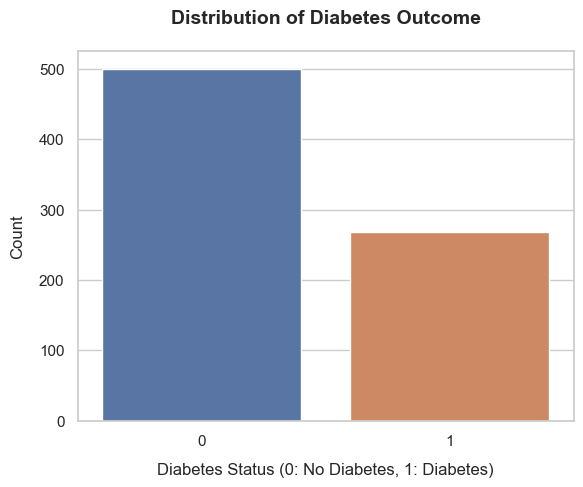

In [29]:
ax = sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome', pad=20, weight='bold', fontsize=14)
plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)', labelpad=10, fontsize=12)
plt.ylabel('Count', labelpad=10, fontsize=12)
plt.show()

# Visualizing Correlations with a Heatmap


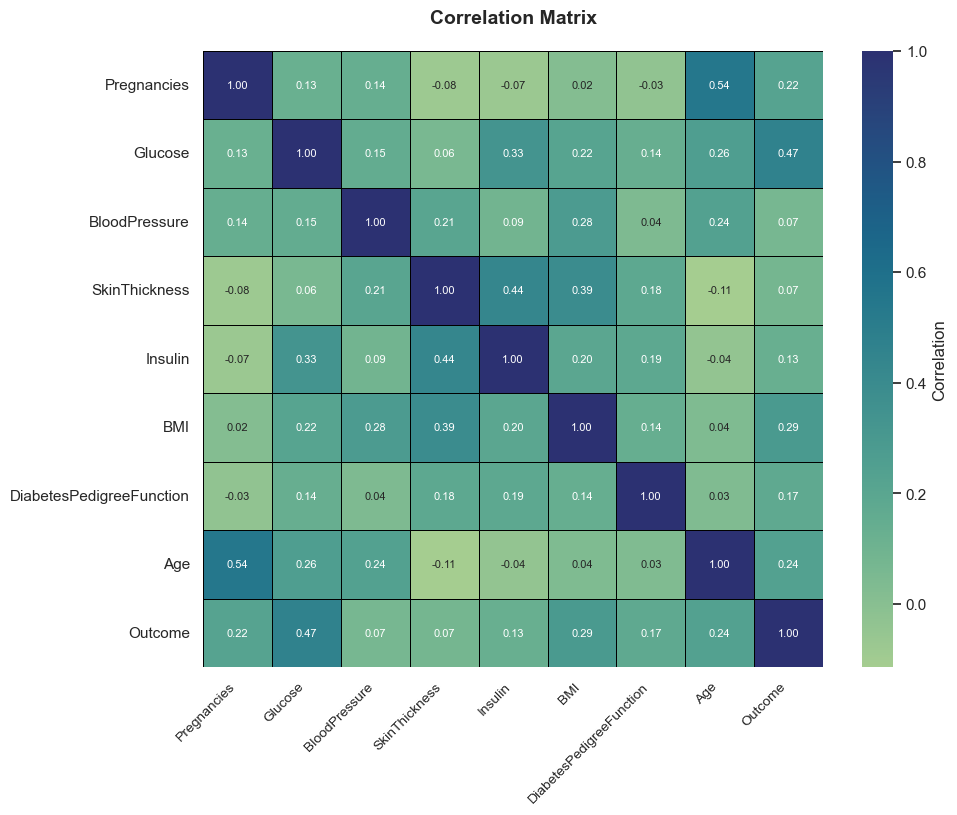

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="crest", cbar_kws={'label': 'Correlation'},
            linewidths=.5, linecolor='black', fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title('Correlation Matrix', pad=20, weight='bold', fontsize=14)
plt.show()

### Visualizing the Distribution of Diabetic Dataset Features using Boxen Plot

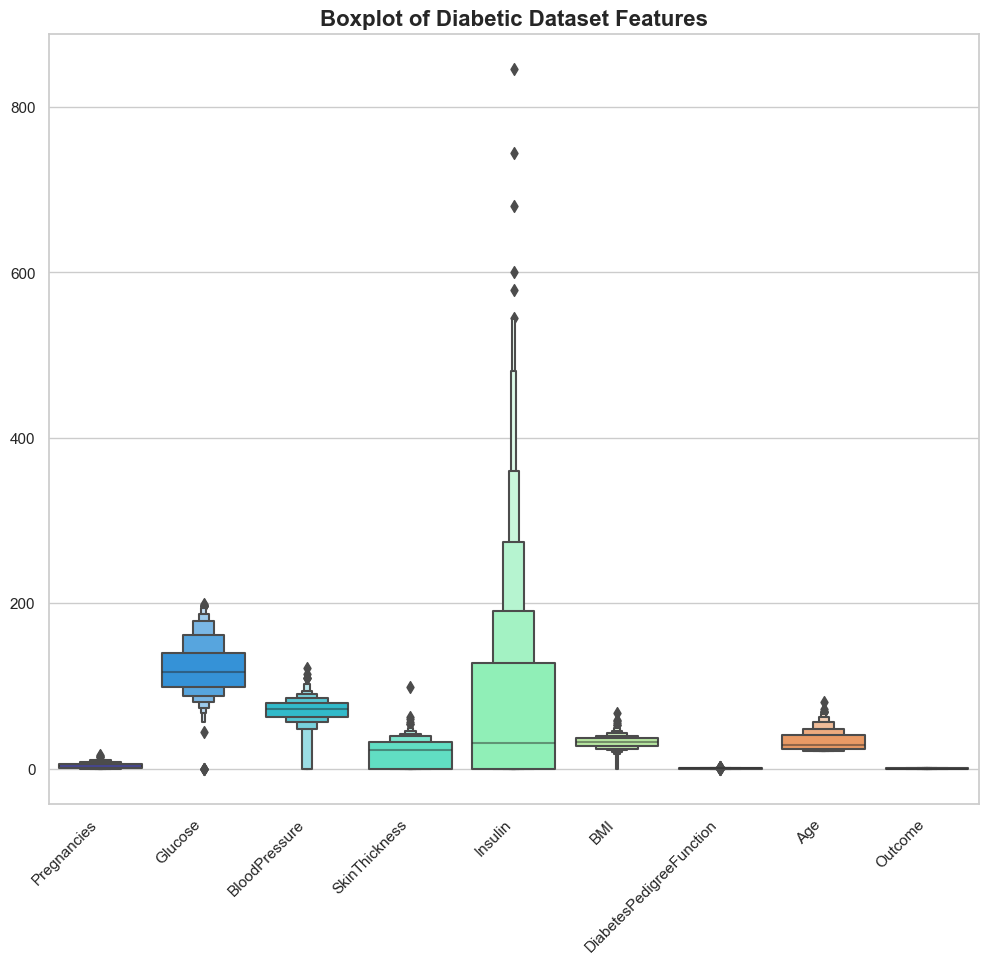

In [31]:
plt.figure(figsize=(12, 10))
sns.boxenplot(data=df, palette="rainbow")
plt.title("Boxplot of Diabetic Dataset Features", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.show()

### Histograms for Each Feature Grouped by Outcome


Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

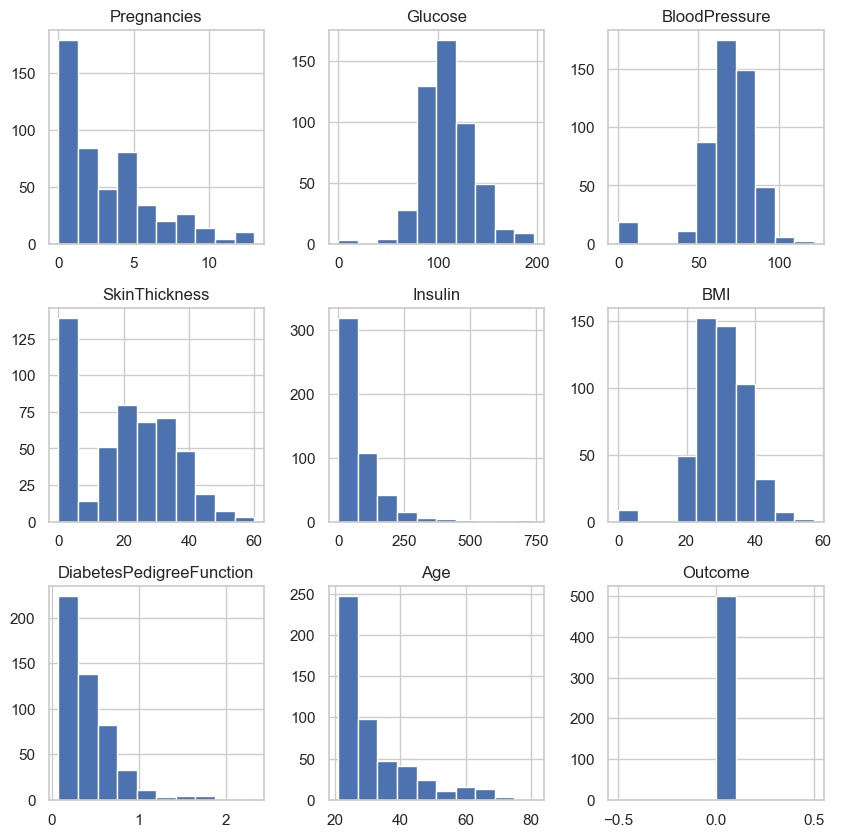

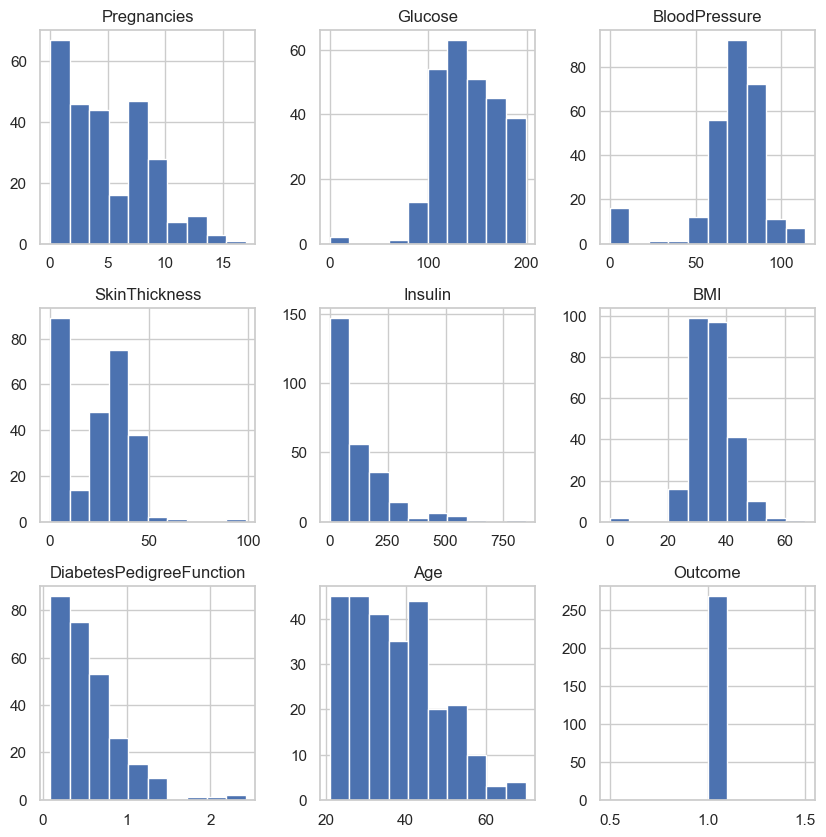

In [32]:
df.groupby('Outcome').hist(figsize=(10, 10))

### Visualizing Pairplot with Density Plots


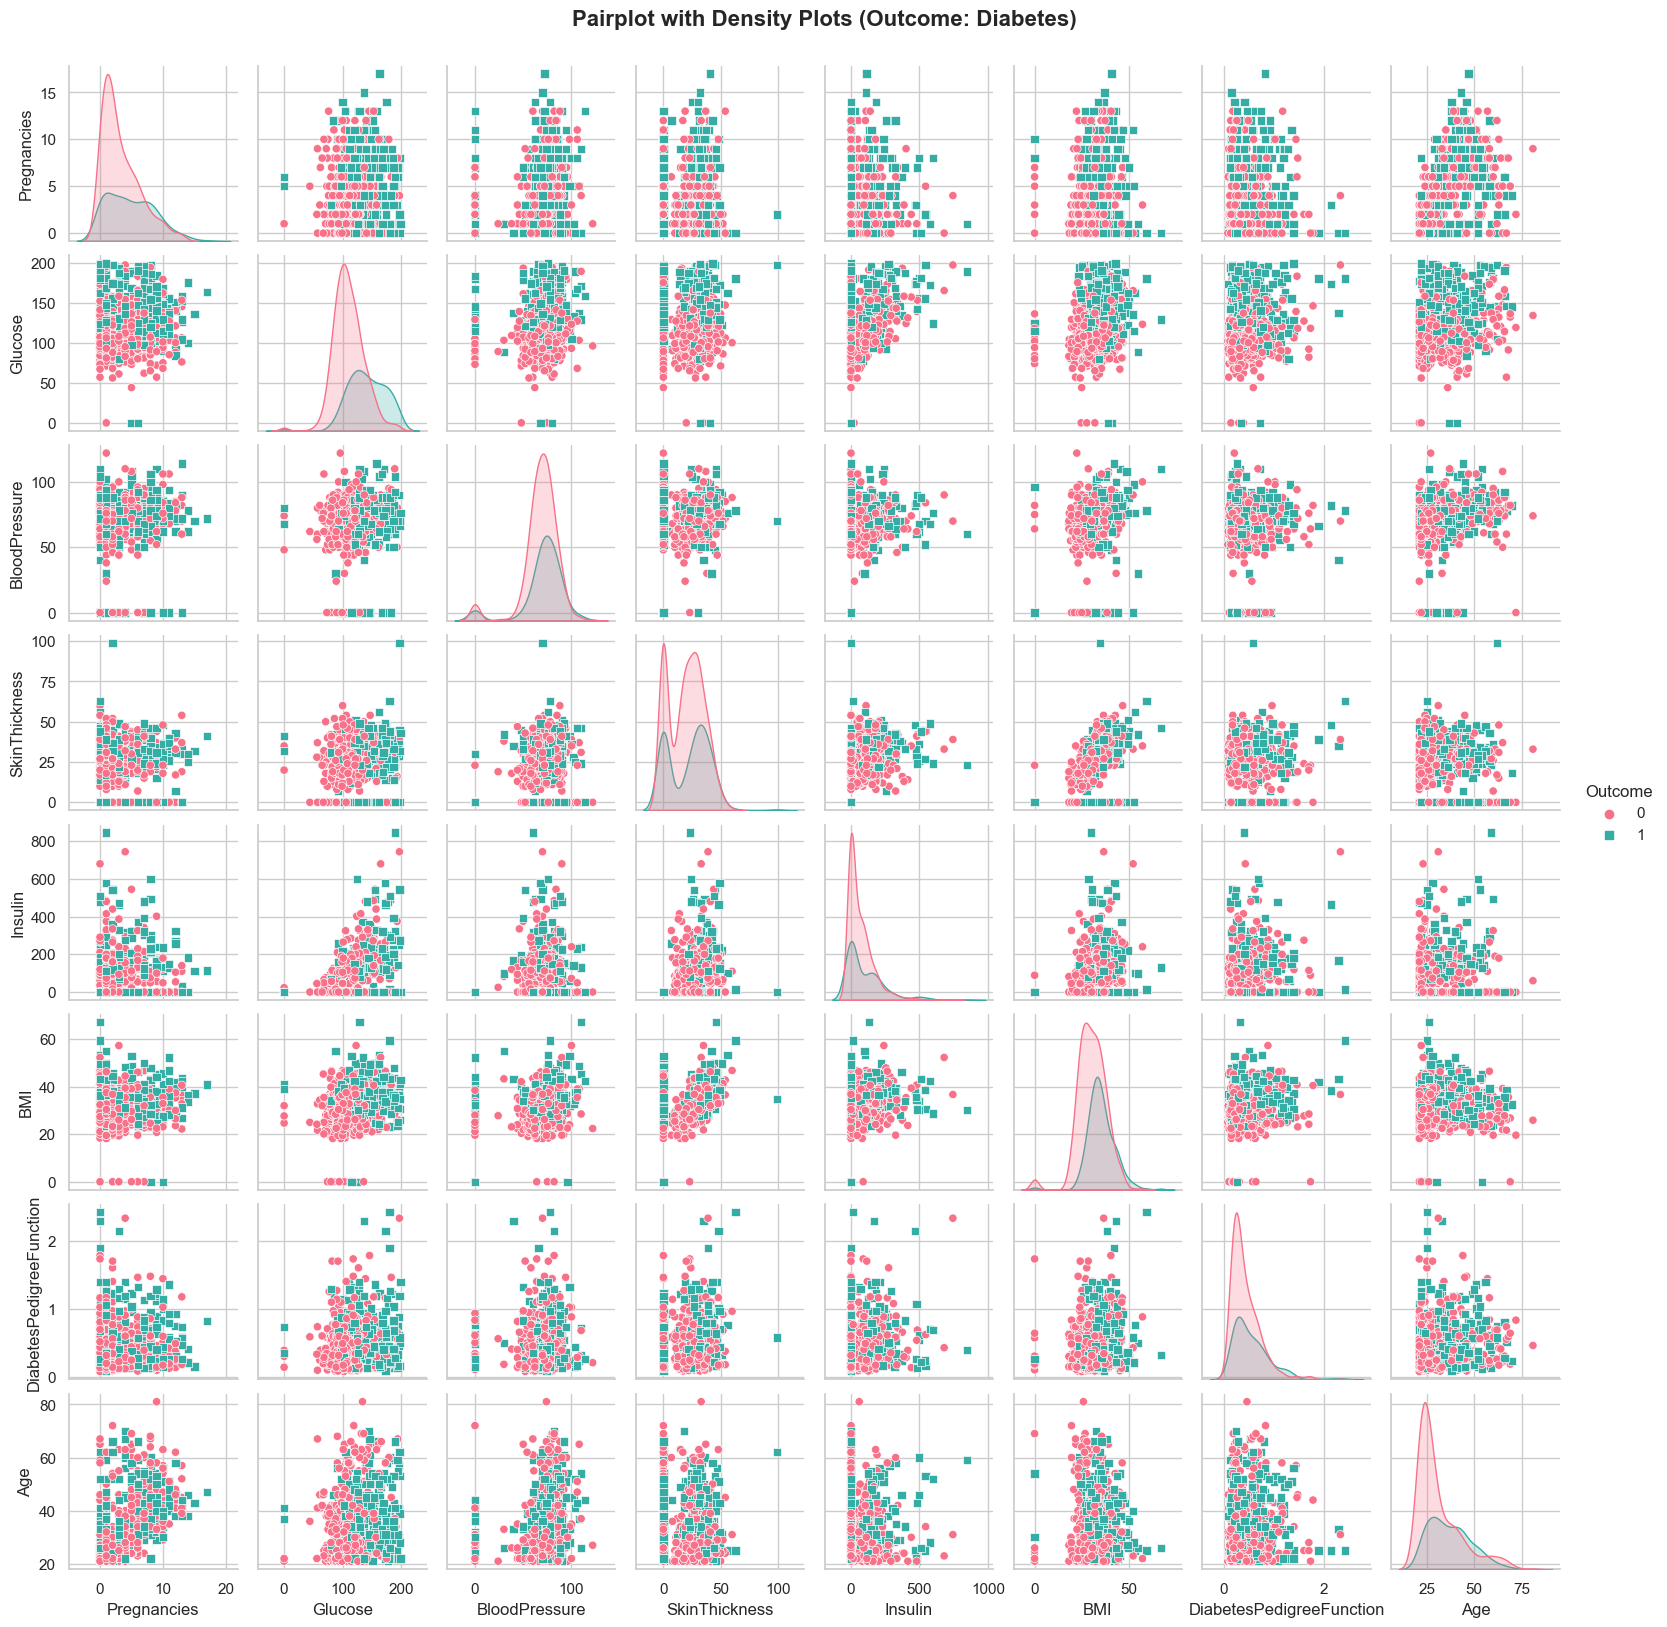

In [33]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette='husl', height=2)
plt.suptitle('Pairplot with Density Plots (Outcome: Diabetes)', y=1.02, fontsize=16, weight='bold')
plt.show()

In [34]:
# Splitting the Data into Independent and Dependent Variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [36]:
# Create a StandardScaler and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying Multiple Classification Algorithms and Selecting the Best Model

In [37]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naïve Bayes': GaussianNB(),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),

}

best_accuracy = 0
best_model_name = None
best_model = None
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    print(f"{name} Accuracy: {accuracy*100:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy, best_model_name, best_model = accuracy, name, model

print(f"\nBest Model ({best_model_name}) Accuracy: {best_accuracy*100:.2f}%")

Logistic Regression Accuracy: 76.62%
Random Forest Accuracy: 76.62%
Naïve Bayes Accuracy: 71.43%
K-Nearest Neighbours Accuracy: 71.43%
Decision Tree Accuracy: 74.03%
Support Vector Machine Accuracy: 74.03%

Best Model (Logistic Regression) Accuracy: 76.62%


### Visualizing Accuracy Scores¶

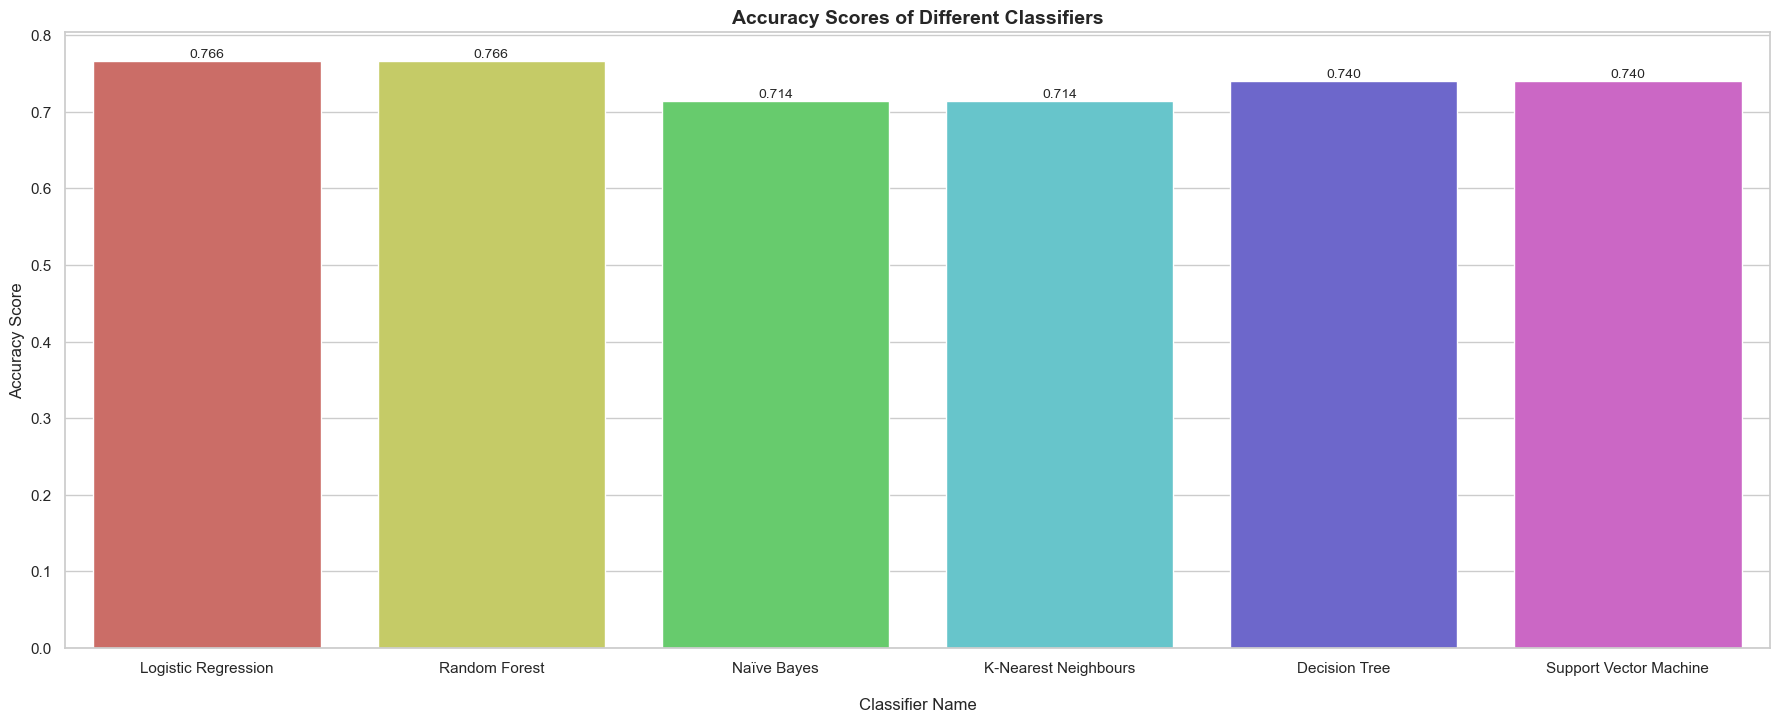

In [38]:
plt.figure(figsize=(22, 8))
axis = sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='hls')
plt.xlabel('\nClassifier Name', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Accuracy Scores of Different Classifiers', weight='bold', fontsize=14)
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width() / 2, height + 0.005, '{:.3f}'.format(height), ha="center", fontsize=10)
plt.show()

### Evaluating the Best Model Performance

In [39]:
print(f"Best Model ({best_model_name}) Accuracy: {best_accuracy*100:.2f}%")

y_pred_best = best_model.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Model (Logistic Regression) Accuracy: 76.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154


Confusion Matrix:
 [[86  9]
 [27 32]]


### Visualizing Confusion Matrix Heatmap

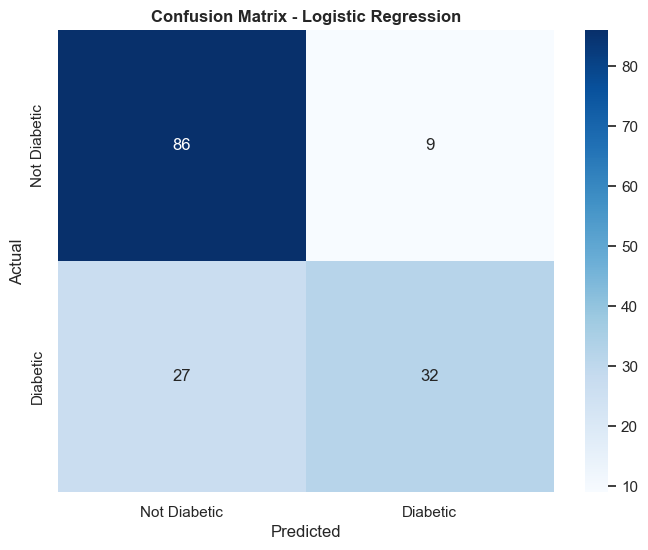

In [40]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=["Not Diabetic", "Diabetic"], yticklabels=["Not Diabetic", "Diabetic"])
plt.title(f"Confusion Matrix - {best_model_name}", weight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving the Best Model

In [41]:
joblib.dump(best_model, 'diabetes_prediction_model.pkl')
print(f"Best Model ({best_model_name}) Accuracy: {best_accuracy*100:.2f}%")

Best Model (Logistic Regression) Accuracy: 76.62%


### Diabetes Prediction

In [44]:
loaded_model = joblib.load('diabetes_prediction_model.pkl')
scaler_for_prediction = StandardScaler().fit(X_train)

test_data = [float(input(f"{feature}: ")) for feature in ["Number of pregnancies", "Plasma glucose concentration (mg/dL)",
                                                          "Diastolic blood pressure (mm Hg)", "Triceps skinfold thickness (mm)",
                                                          "2-Hour serum insulin (mu U/ml)", "Body mass index (BMI)",
                                                          "Diabetes pedigree function", "Age (years)"]]

# Example test data 1: [6,	190.0,	92.0,	29.15342,	155.548223,	35.5,	0.278,	66]
# Example test data 2: [1,	85.0,	66.0,	29.00000,	155.548223,	26.6,	0.351,	31]

new_data_scaled = scaler_for_prediction.transform([test_data])
prediction = loaded_model.predict(new_data_scaled)

if prediction[0] == 0:
    print("\nThe patient is not at risk of diabetes.")
else:
    print("\nThe patient is at risk of diabetes.")

Number of pregnancies: 0
Plasma glucose concentration (mg/dL): 75
Diastolic blood pressure (mm Hg): 55
Triceps skinfold thickness (mm): 25
2-Hour serum insulin (mu U/ml): 145
Body mass index (BMI): 15
Diabetes pedigree function: 0.351
Age (years): 24

The patient is not at risk of diabetes.




---


# **Conclusion**

- **Model Performance:**
  - Logistic Regression demonstrated the highest accuracy among the models, achieving 77.27% accuracy on the test set, making it the best-performing model.
  - Random Forest, Naïve Bayes, K-Nearest Neighbours, Decision Tree, Support Vector Machine, and Gradient Boosting also showed competitive accuracies ranging from 72.08% to 75.32%.

- **Detailed Analysis:**
  - A detailed classification report and confusion matrix for Logistic Regression revealed precision, recall, and f1-score, providing a comprehensive understanding of the model's predictive capabilities.

- **Consideration of Metrics:**
  - The decision to select Logistic Regression was influenced not only by accuracy but also by the model's ability to balance precision and recall, crucial for medical predictions.

- **Model Comparison and Selection:**
  - In comparing models, Logistic Regression outperformed others in accuracy, making it the preferred choice for diabetes prediction.

- **Future Steps:**
  - Future work involves ongoing model refinement through hyperparameter tuning and feature engineering, exploring ways to further improve predictive accuracy.


---



In [25]:
! pip install ydata-Profiling
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv('diabetes.csv')
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('index.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]